In [1]:
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [3]:
import pandas as pd
import numpy as np

# Timeline

In [11]:
_ = (
    pd.read_csv(
        'rehydrated_tweets_count_by_day.csv',
        parse_dates=['day'],
        index_col=['day', 'lang']
   )
    ['count']
    .unstack('lang', fill_value=0)
)

_['total'] = _.sum(axis=1)
_ = _[['lv', 'ru', 'en', 'total']]

timeline = _

In [12]:
timeline.head()

lang,lv,ru,en,total
day,,,,
2017-04-15,1313,367,138,1967
2017-04-16,1467,340,191,2211
2017-04-17,1370,290,182,2015
2017-04-18,2789,383,313,3668
2017-04-19,3173,453,310,4165


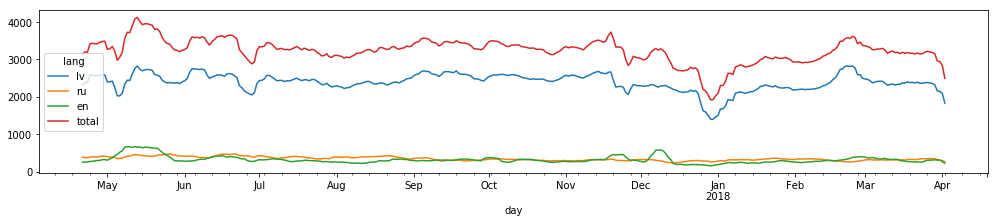

In [13]:
_ = timeline.rolling(window=7).mean().plot(figsize=(17, 3))

_.figure.savefig('rehydrated_tweets_count_by_day.pdf')

# Language usage 

In [33]:
_ = pd.read_csv('rehydrated_tweets_lang_usage.csv', index_col='rnum')

_['Language Uniformity Score'] = (_[['lv', 'ru', 'en']].max(axis=1) / _[['lv', 'ru', 'en']].sum(axis=1)).round(2)

lang_usage = _

In [34]:
lang_usage.head()

,lv,ru,en,total,Language Uniformity Score
rnum,,,,,
1,26341,0,13,26417,1.0
2,22132,0,3,22190,1.0
3,20173,0,0,20228,1.0
4,17512,0,14,17635,1.0
5,15715,0,14,15844,1.0


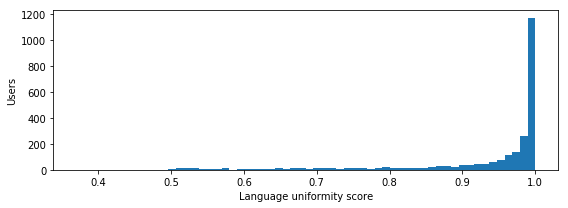

In [35]:
_ = lang_usage['Language Uniformity Score'].plot.hist(bins=60, figsize=(8, 3))

_.set(xlabel="Language uniformity score", ylabel="Users")
_.figure.tight_layout()

_.figure.savefig('rehydrated_tweets_lang_usage.pdf')

In [40]:
lang_usage[lang_usage['Language Uniformity Score'] < 0.51].sort_values('Language Uniformity Score')

,lv,ru,en,total,Language Uniformity Score
rnum,,,,,
1708,13,16,14,74,0.37
1436,14,18,14,92,0.39
845,48,55,34,174,0.40
423,71,118,81,391,0.44
1686,32,6,30,76,0.47
1416,36,5,33,94,0.49
219,350,0,344,787,0.50
320,220,226,6,511,0.50
1132,62,0,61,125,0.50
